In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset

In [2]:
import matplotlib.pyplot as plt

In [3]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"

# Select variable

In [4]:
#Variable 
variable85="rcp85_tg_mean_annual"
variable45="rcp45_tg_mean_annual"
#variable="rcp[48]5_tg_mean_annual"

files85 = glob.glob(folder+"*"+variable85+".nc")
files45 = glob.glob(folder+"*"+variable45+".nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
files85
files45


['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp45_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp45_tg_mean_annual.nc']

# FOR RCP45 

In [5]:
dsEns45= ens.create_ensemble(files45)
#dsEnsSeas45 = ens.create_ensemble(filesSeas)
dsEns45


<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 151)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * time         (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 10, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. For internal use only.

## Get the percentiles

In [6]:
# figure
#dsEns45 = dsEns45.assign_coords({'region':mask45})
# spatial means - grouby region mask
#out45 = dsEns45.groupby(dsEns45.region).mean()
#print(out45)
# Calculate ensembles percentiles on regional means
perctiles45 = ens.ensemble_percentiles(dsEns45)
perctiles45
dsEns45 =0

## Convert in Dataframe

In [7]:
dfper145 = perctiles45.to_dataframe().dropna()
dfper45 = perctiles45.drop('realization').to_dataframe().dropna()
dfmean45 = dfper45.reset_index()
dfper45 = 0

In [8]:
dfmean45

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,66.623306,-89.045212,1950-01-01,257.085693,258.653290,260.071655
1,66.623306,-89.045212,1951-01-01,256.835785,258.389740,259.078644
2,66.623306,-89.045212,1952-01-01,257.146881,258.677917,259.168579
3,66.623306,-89.045212,1953-01-01,257.813049,258.613068,259.164734
4,66.623306,-89.045212,1954-01-01,258.522583,259.148529,259.997162
...,...,...,...,...,...,...
11507101,40.041039,-74.045807,2096-01-01,287.267639,287.622437,289.489594
11507102,40.041039,-74.045807,2097-01-01,286.741150,287.997528,288.674133
11507103,40.041039,-74.045807,2098-01-01,286.326630,287.628967,288.842590
11507104,40.041039,-74.045807,2099-01-01,286.937592,287.839813,290.203461


## Cut by region

# TO-DO 
- Cut by region
- Continue with below operatons within the loop for each region for rcp45, rcp85 and observed

## Get the lat lon regions

In [10]:
regions_folder = "/home/mlopez/EXEC/Grids-polygons-regions/"

In [11]:
files_regions = glob.glob(regions_folder+"*"+"lat_lon.feather")
files_regions

['/home/mlopez/EXEC/Grids-polygons-regions/DDE_STF_20K_REG_FOR_VUE_Slat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/DDE_STF_20K_UA_PER_VUE_Slat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/DOM_BIOlat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/REG_ECOlat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/SDOM_BIOlat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/Secteurs_Operations_Regionaleslat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/SREG_ECOlat_lon.feather',
 '/home/mlopez/EXEC/Grids-polygons-regions/territoire_guidelat_lon.feather']

In [12]:
listdfreg=[]
for region in files_regions:
    df = pd.read_feather(region)
    listdfreg.append(df)
   

In [13]:
listdfreg[1]

,index,lat,lon,index_right,OBJECTID,PER_NO_UA,DATE_PUBLI,SUPERFICIE,Shape_Leng,Shape_Area,D_GENERAl
0,71387,52.373878,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est
1,71803,52.290550,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est
2,71804,52.290550,-68.046051,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est
3,71805,52.290550,-67.962723,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est
4,71806,52.290550,-67.879387,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est
...,...,...,...,...,...,...,...,...,...,...,...
7611,105464,45.540821,-71.045929,72,73,05151,2019-11-30,2554.5,4.004611e+04,2.559616e+07,None
7612,105881,45.457489,-70.962601,71,72,05151,2019-11-30,2664.9,4.870958e+04,2.671080e+07,None
7613,105884,45.457489,-70.712608,69,70,05151,2019-11-30,9572.5,5.764414e+04,9.594909e+07,None
7614,106297,45.374161,-70.962601,2,3,05151,2019-11-30,1657.5,3.229192e+04,1.662015e+07,None


In [24]:
lisdfregdata45 =[]
for dfregion in listdfreg:
    dfdatareg45 = pd.merge(dfregion, dfmean45, on=["lat","lon"])
    lisdfregdata45.append(dfdatareg45)

In [40]:
listdfreg=[]

In [25]:
lisdfregdata45[1]

,index,lat,lon,index_right,OBJECTID,PER_NO_UA,DATE_PUBLI,SUPERFICIE,Shape_Leng,Shape_Area,D_GENERAl,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,71387,52.373878,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est,1950-01-01,268.789032,269.166229,270.688904
1,71387,52.373878,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est,1951-01-01,267.825256,268.893188,269.469147
2,71387,52.373878,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est,1952-01-01,268.255157,269.260284,270.207703
3,71387,52.373878,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est,1953-01-01,268.328583,269.103821,270.563354
4,71387,52.373878,-68.129379,40,41,09352,2019-11-30,1424519.6,1.241968e+06,1.404552e+10,Nord-Est,1954-01-01,268.174011,269.902985,270.895325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150011,106711,45.290829,-71.129257,5,6,05151,2019-11-30,2353.5,3.875096e+04,2.360611e+07,None,2096-01-01,278.609772,280.226044,281.615631
1150012,106711,45.290829,-71.129257,5,6,05151,2019-11-30,2353.5,3.875096e+04,2.360611e+07,None,2097-01-01,278.376892,280.244904,281.501831
1150013,106711,45.290829,-71.129257,5,6,05151,2019-11-30,2353.5,3.875096e+04,2.360611e+07,None,2098-01-01,278.167236,280.005920,280.946625
1150014,106711,45.290829,-71.129257,5,6,05151,2019-11-30,2353.5,3.875096e+04,2.360611e+07,None,2099-01-01,278.631653,280.080017,282.050476


## Get mean by year

In [41]:
dfmean452 = dfmean45.groupby(["time", "PER_NO_UA"]).mean()

KeyError: 'PER_NO_UA'

In [27]:
dfmean452

,lat,lon,tg_mean_p10,tg_mean_p50,tg_mean_p90
time,,,,,
1950-01-01,52.173106,-73.902198,270.949773,271.676139,273.126052
1951-01-01,52.173106,-73.902198,270.474915,271.307753,272.088069
1952-01-01,52.173106,-73.902198,270.662092,271.586522,272.583753
1953-01-01,52.173106,-73.902198,270.780065,271.519265,272.734888
1954-01-01,52.173106,-73.902198,270.700543,271.912506,273.275533
...,...,...,...,...,...
2096-01-01,52.173106,-73.902198,274.415943,275.844440,277.540586
2097-01-01,52.173106,-73.902198,273.870527,276.053780,277.713161
2098-01-01,52.173106,-73.902198,274.269055,276.065171,277.542156


## 4th degre polynomium

In [28]:
def polysmooth(years, y, degree):
    coef = np.polyfit(years, y, degree)
    return np.polyval(coef,years)

In [36]:
years = dfmean452.reset_index().time.dt.year
#years
#years.values
df452 = dfmean452.reset_index()
dfmean452 =0
df452

,time,lat,lon,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,1950-01-01,52.173106,-73.902198,270.949773,271.676139,273.126052
1,1951-01-01,52.173106,-73.902198,270.474915,271.307753,272.088069
2,1952-01-01,52.173106,-73.902198,270.662092,271.586522,272.583753
3,1953-01-01,52.173106,-73.902198,270.780065,271.519265,272.734888
4,1954-01-01,52.173106,-73.902198,270.700543,271.912506,273.275533
...,...,...,...,...,...,...
146,2096-01-01,52.173106,-73.902198,274.415943,275.844440,277.540586
147,2097-01-01,52.173106,-73.902198,273.870527,276.053780,277.713161
148,2098-01-01,52.173106,-73.902198,274.269055,276.065171,277.542156
149,2099-01-01,52.173106,-73.902198,274.073875,275.914955,277.726134


In [30]:
rp1 = polysmooth(years,dfmean452.tg_mean_p10,4)
rp5 = polysmooth(years,dfmean452.tg_mean_p50,4)
rp9 = polysmooth(years,dfmean452.tg_mean_p90,4)

## Create DF to plot TimeSeries graph in R

In [31]:
df45 = pd.DataFrame()
df45["time"] = years.values
df45["tg_mean_p10"] = rp1
df45["tg_mean_p50"] = rp5
df45["tg_mean_p90"] = rp9
df45["tg_mean_p10"] = round(df45["tg_mean_p10"]-273.15, 2)
df45["tg_mean_p50"] = round(df45["tg_mean_p50"]-273.15, 2)
df45["tg_mean_p90"] = round(df45["tg_mean_p90"]-273.15, 2)

In [32]:
df45

,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,1950,-2.52,-1.49,-0.30
1,1951,-2.51,-1.50,-0.34
2,1952,-2.50,-1.51,-0.37
3,1953,-2.49,-1.52,-0.40
4,1954,-2.48,-1.52,-0.42
...,...,...,...,...
146,2096,1.04,2.73,4.30
147,2097,1.03,2.74,4.33
148,2098,1.01,2.74,4.36
149,2099,1.00,2.75,4.39


### TODO:
- This dataframe should include both models (RCP 4.5 nad 8.5) and observations (historic)
- I should add labels and similar colors into the shiny graph

In [37]:
df45.to_csv("p4tgmean.csv")

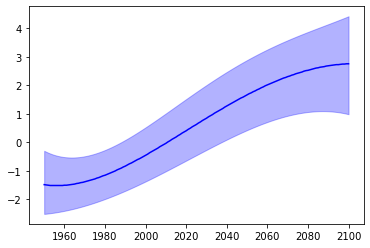

In [39]:
plt.plot(years, df45["tg_mean_p50"], markersize='10', color='blue')
plt.fill_between(years, polysmooth(years, df45.tg_mean_p10,4), polysmooth(years, df45.tg_mean_p90,4), alpha=0.3, color='blue')

In [ ]:
dfmean2.to_csv("timeseries.csv")

### NOTE: this example was for the whole region. 
### TODO: 
- Split DF by regions and get same graph for each region
- Convert degrees in Celsius